<a href="https://colab.research.google.com/github/Seong-jieun/netflix_eda/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요
- 넷플릭스의 콘텐츠 제목, 감독, 개봉연도, 설명 등을 포함하는 데이터 세트
- 출처: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/data
- EDA

# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
from wordcloud import WordCloud

# 데이터 불러오기

In [2]:
df = pd.read_csv('/content/drive/MyDrive/personal_da_project/netflix_titles.csv')

# 데이터 파악 & 전처리

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 컬럼 설명

- show_id: 작품 고유 식별자
- type: 작품의 카테고리. 'Movie'와 'TV Show'
- title: 제목
- director: 감독
- cast: 출연 배우들
- country: 제작 국가
- date_added: 넷플릭스에 추가된 날짜
- release_year: 개봉 연도
- rating: 영상물 등급
- duration: 영화-작품의 러닝타임(분), 티비쇼-시즌
- listed_in: 장르
- description: 간략한 설명

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## 결측치 처리

- null값 처리 계획
    - director -> Unknown
    - cast -> Unknown
    - country -> Unknown
    - date_added -> 삭제
    - rating -> 삭제
    - duration -> 삭제

In [4]:
# 'director', 'cast', 'country' 컬럼의 결측치를 Unknown으로 대체
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# 결측치 제거
df.dropna(inplace=True)

# 중복값 제거
df.drop_duplicates(inplace=True)

## 날짜 데이터 타입 변경 & 파생변수 생성

In [5]:
# 'date_added'의 공백 제거
df['date_added'] = df['date_added'].str.strip()

# 'date_added' 데이터 타입 변경
df['date_added'] = pd.to_datetime(df['date_added'])

# 연, 월 컬럼 생성 (작품이 넷플릭스에 추가된 연, 월 정보)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [ ]:
# 최종 df 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int32         
 13  month_added   8790 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 995.7+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


In [6]:
min_date = df['date_added'].min()
max_date = df['date_added'].max()

print(f'({min_date}부터 {max_date}까지의 데이터이다)')

(2008-01-01 00:00:00부터 2021-09-25 00:00:00까지의 데이터이다)


In [ ]:
#df.to_csv('netflix_titles_preprocessed.csv', index=False)

# EDA

## type

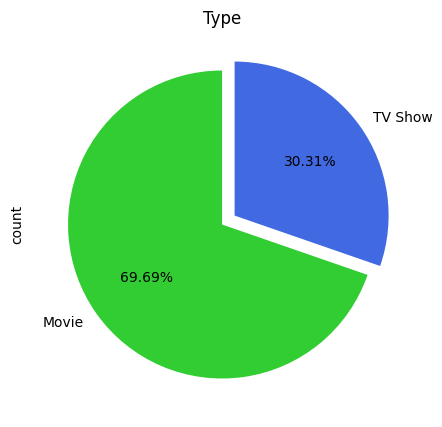

In [7]:
# type별 비율
df['type'].value_counts().plot.pie(figsize=(5, 5), autopct='%1.2f%%', startangle=90, explode=[0, 0.1], colors = ['limegreen', 'royalblue'])
plt.title('Type')
plt.show()

# Movie: 69.69% | TV Show: 30.31%
# Movie의 비중이 더 높다

## director

In [104]:
# 상위 10개 director 데이터프레임 생성 (Unknown 제외)
director_counts = df[df['director'] != 'Unknown']['director'].value_counts()
top_10_directors = director_counts.head(10)

top_10_directors = pd.DataFrame(top_10_directors)
top_10_directors.reset_index(inplace=True)
top_10_directors.columns = ['director', 'count']

print(top_10_directors)

                 director  count
0           Rajiv Chilaka     19
1  Raúl Campos, Jan Suter     18
2            Marcus Raboy     16
3             Suhas Kadav     16
4               Jay Karas     14
5     Cathy Garcia-Molina     13
6         Martin Scorsese     12
7             Jay Chapman     12
8         Youssef Chahine     12
9        Steven Spielberg     11


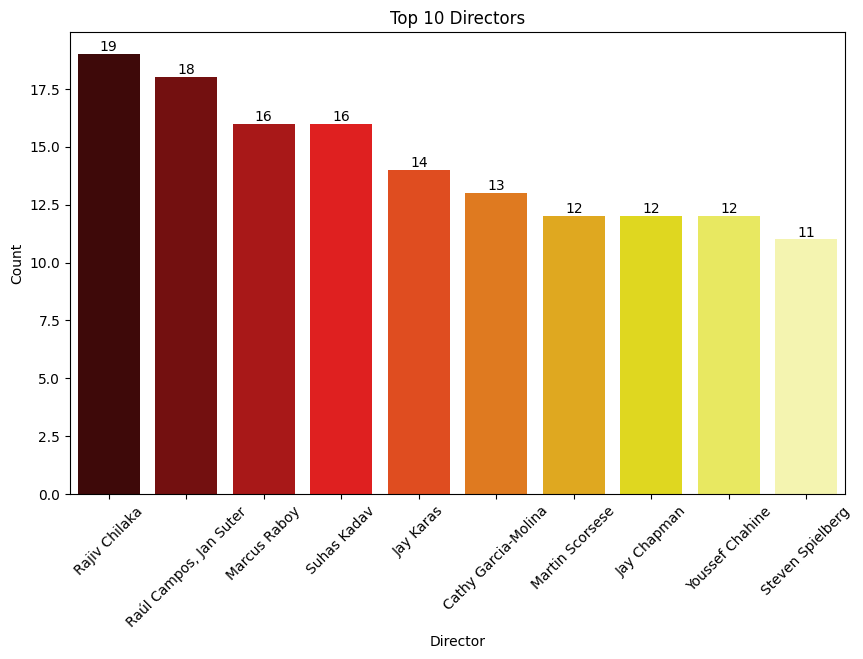

In [107]:
# 상위 10개 director 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_directors, x='director', y='count', palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country

In [11]:
df['country'].nunique()

# 총 국가 수: 749

749

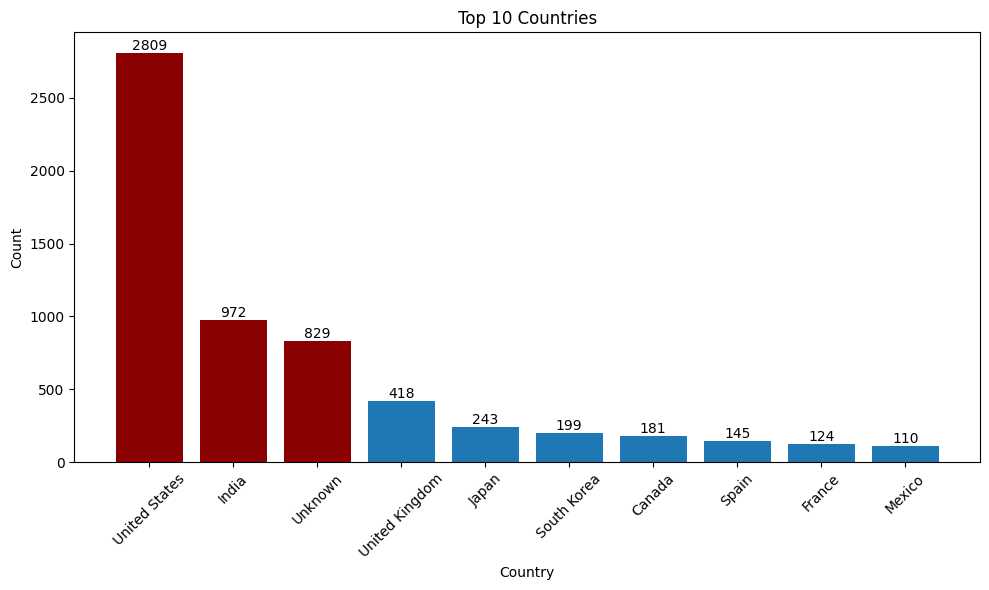

In [12]:
# country
# country 상위 10개
country_10 = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(country_10.index, country_10.values)

# count 값 표시
for bar, count in zip(bars, country_10.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha='center', va='bottom')

# 상위 3개 국가 다른 색으로 표시
plt.bar(country_10.index[:3], country_10.values[:3], color = 'darkred')

plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

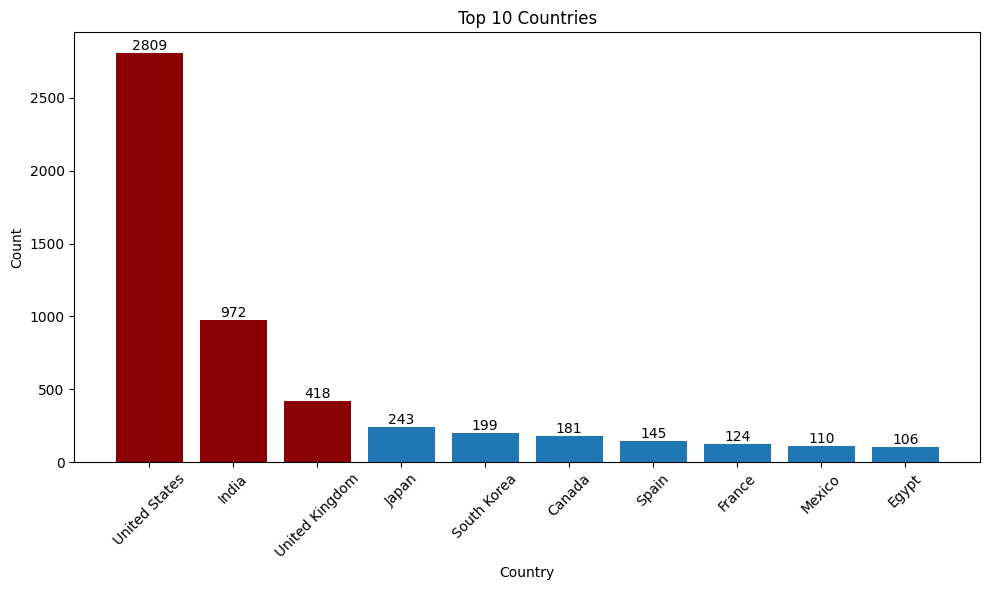

In [26]:
# Unknown 제외하고 top 10 국가 확인
country_top10 = df[df['country'] != 'Unknown']['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(country_top10.index, country_top10.values)

# count 값 표시
for bar, count in zip(bars, country_top10.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha='center', va='bottom')

# 상위 3개 국가 다른 색으로 표시
plt.bar(country_top10.index[:3], country_top10.values[:3], color = 'darkred')

plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### country vs type

In [30]:
# 상위 10개 국가 정보 데이터프레임 생성(Unknown 제외)
movie_counts_country = df[(df['type'] == 'Movie') & (df['country'] != 'Unknown')]['country'].value_counts()
tv_show_counts_country = df[(df['type'] == 'TV Show') & (df['country'] != 'Unknown')]['country'].value_counts()
total_counts_country = movie_counts_country + tv_show_counts_country

df_counts = pd.DataFrame({'Movie': movie_counts_country, 'TV Show': tv_show_counts_country, 'Total': total_counts_country})

top_10_countries = df_counts.sort_values('Total', ascending=False).head(10)

print(top_10_countries)

                 Movie  TV Show   Total
country                                
United States   2055.0    754.0  2809.0
India            893.0     79.0   972.0
United Kingdom   206.0    212.0   418.0
Japan             76.0    167.0   243.0
South Korea       41.0    158.0   199.0
Canada           122.0     59.0   181.0
Spain             97.0     48.0   145.0
France            75.0     49.0   124.0
Mexico            70.0     40.0   110.0
Egypt             92.0     14.0   106.0


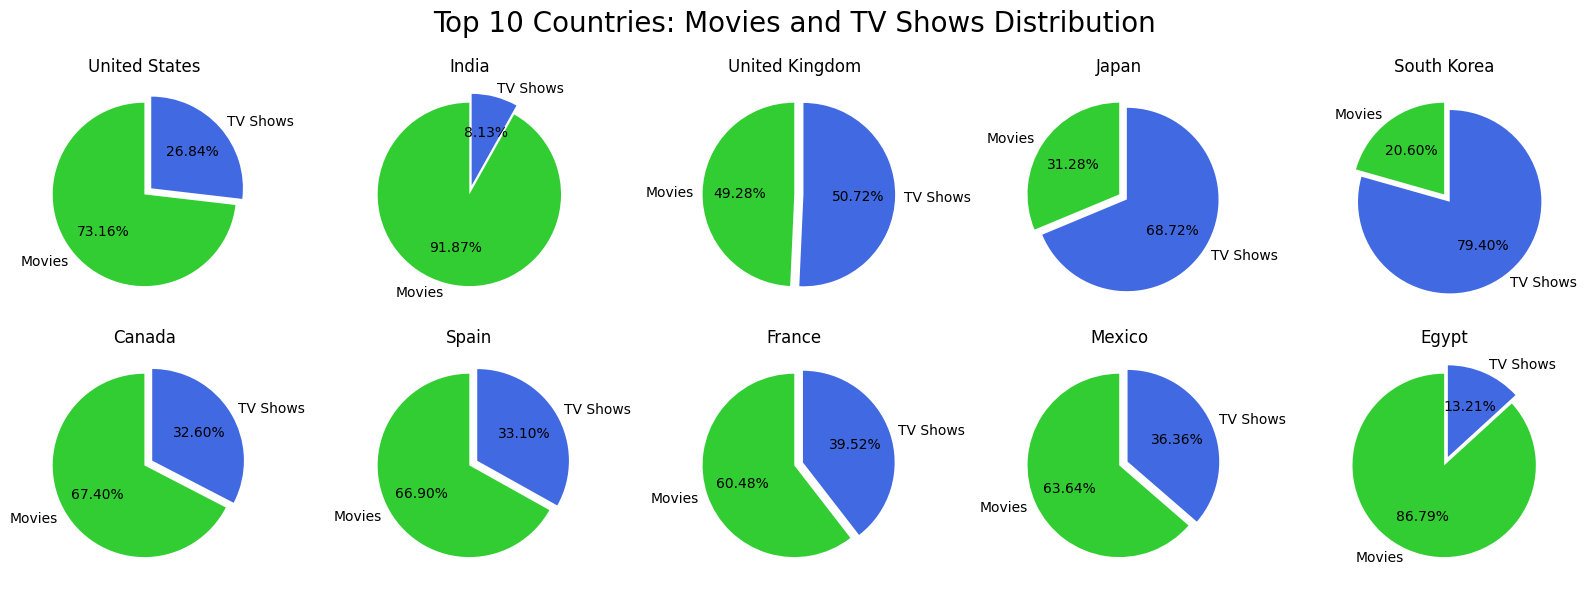

In [31]:
# top_10_countries 시각화
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(16, 6))
fig.suptitle('Top 10 Countries: Movies and TV Shows Distribution', fontsize=20)

for idx, (country, row) in enumerate(top_10_countries.iterrows()):
    ax = axes[idx // 5, idx % 5]
    labels = ['Movies', 'TV Shows']
    sizes = [row['Movie'], row['TV Show']]
    colors = ['limegreen', 'royalblue']
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=[0, 0.1])
    ax.set_title(country)

plt.tight_layout()
plt.show()

- 한국, 일본은 티비 쇼의 비중이 더 높다
    - 한국은 티비 쇼가 79.40%로 10개국 중 티비 쇼의 비중이 제일 높은 나라다
    - 영국은 티비 쇼의 비중이 조금 더 높지만 영화와 비율이 비슷하다
- 그 외 국가들은 영화의 비중이 더 높다
    - 특히 인도는 영화가 91.87%로 영화의 비중이 가장 높다

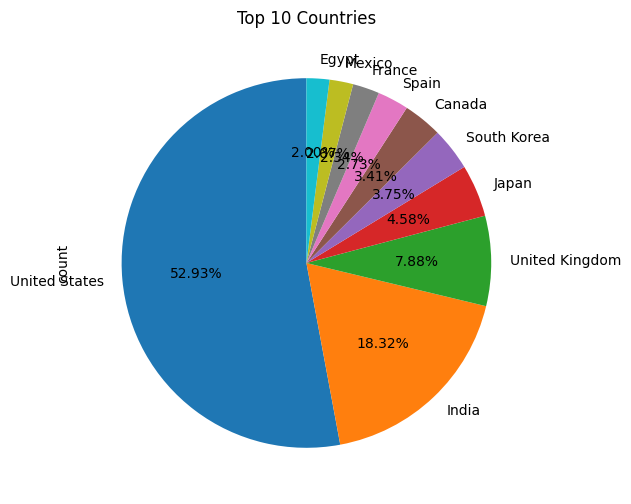

In [24]:
# pieplot으로 표현
top_10_countries.plot.pie(figsize=(6,6), autopct='%1.2f%%', startangle=90)
plt.title('Top 10 Countries')
plt.show()

- Unknown값 제외하고 계산한 결과
- 상위 10개 국가는 순서대로 미국, 인도, 영국, 일본, 한국, 캐나다, 스페인, 프랑스, 멕시코, 이집트이다
- 상위 세 국가는 미국, 인도, 영국이다
- 미국이 상위 10개 국가 중 절반 이상인 52.93%를 차지했다
- 우리나라는 5위이며 비율은 3.75%이다

## release year

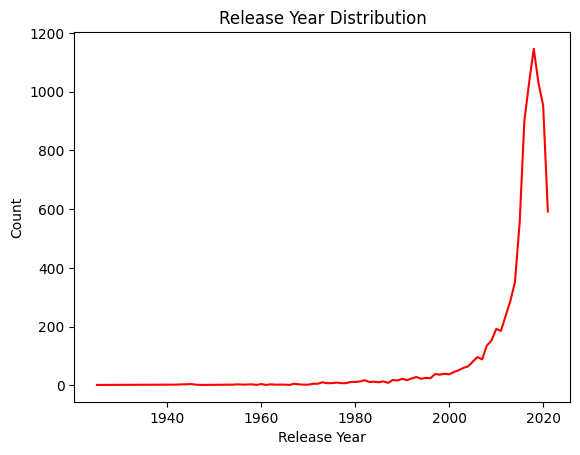

In [8]:
# 개봉 연도별 추이 확인
release_year_dist = df['release_year'].value_counts().sort_index()
release_year_dist.plot(kind='line', color='red')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

### release year vs type

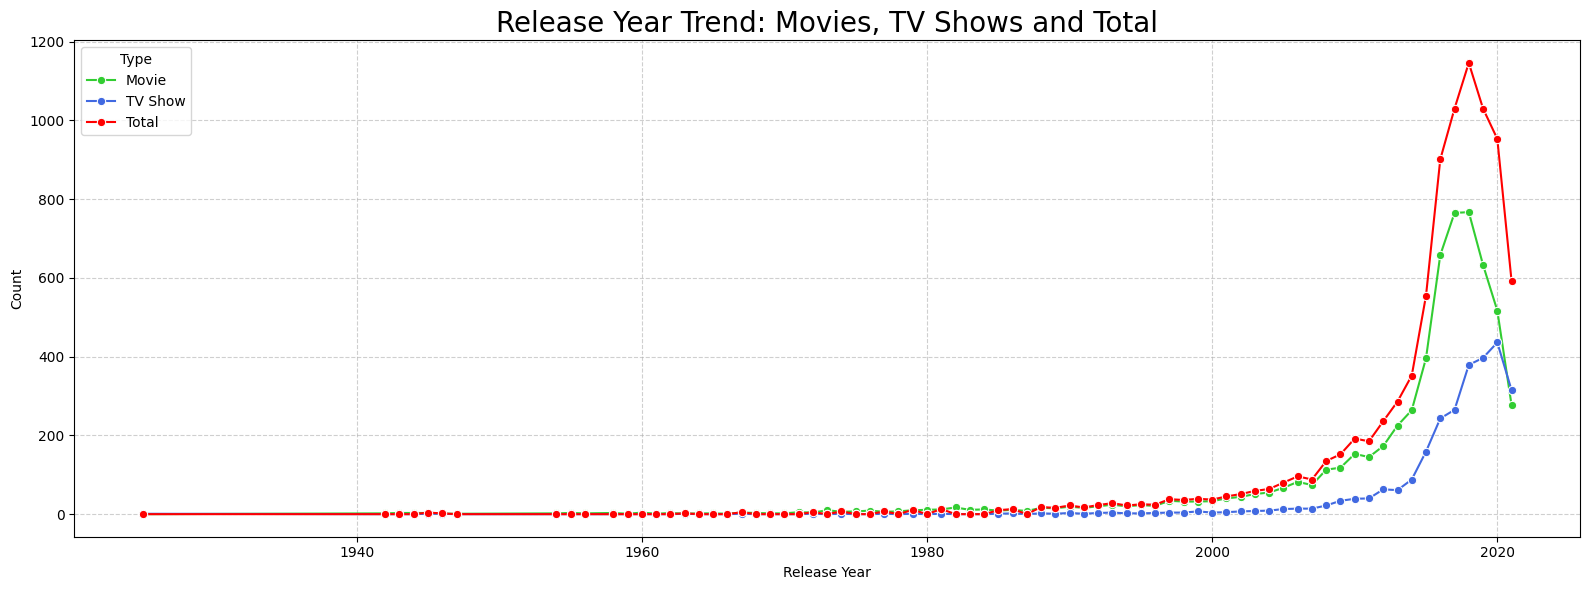

In [9]:
# 개봉연도별 Type별 추이 시각화
# 데이터프레임 생성
movie_release_year = df[df['type'] == 'Movie']['release_year'].value_counts()
tv_show_release_year = df[df['type'] == 'TV Show']['release_year'].value_counts()
total_release_year = movie_release_year + tv_show_release_year

df_release_year = pd.DataFrame({'Movie': movie_release_year, 'TV Show': tv_show_release_year, 'Total': total_release_year})
df_release_year.fillna(0, inplace=True)
df_release_year = df_release_year.reset_index()
df_release_year = df_release_year.rename(columns={'index': 'release_year'})

# 시각화
plt.figure(figsize=(16, 6))

sns.lineplot(data=df_release_year, x='release_year', y='Movie', label='Movie', marker='o', color='limegreen')
sns.lineplot(data=df_release_year, x='release_year', y='TV Show', label='TV Show', marker='o', color='royalblue')
sns.lineplot(data=df_release_year, x='release_year', y='Total', label='Total', marker='o', color='red')

plt.title('Release Year Trend: Movies, TV Shows and Total', fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

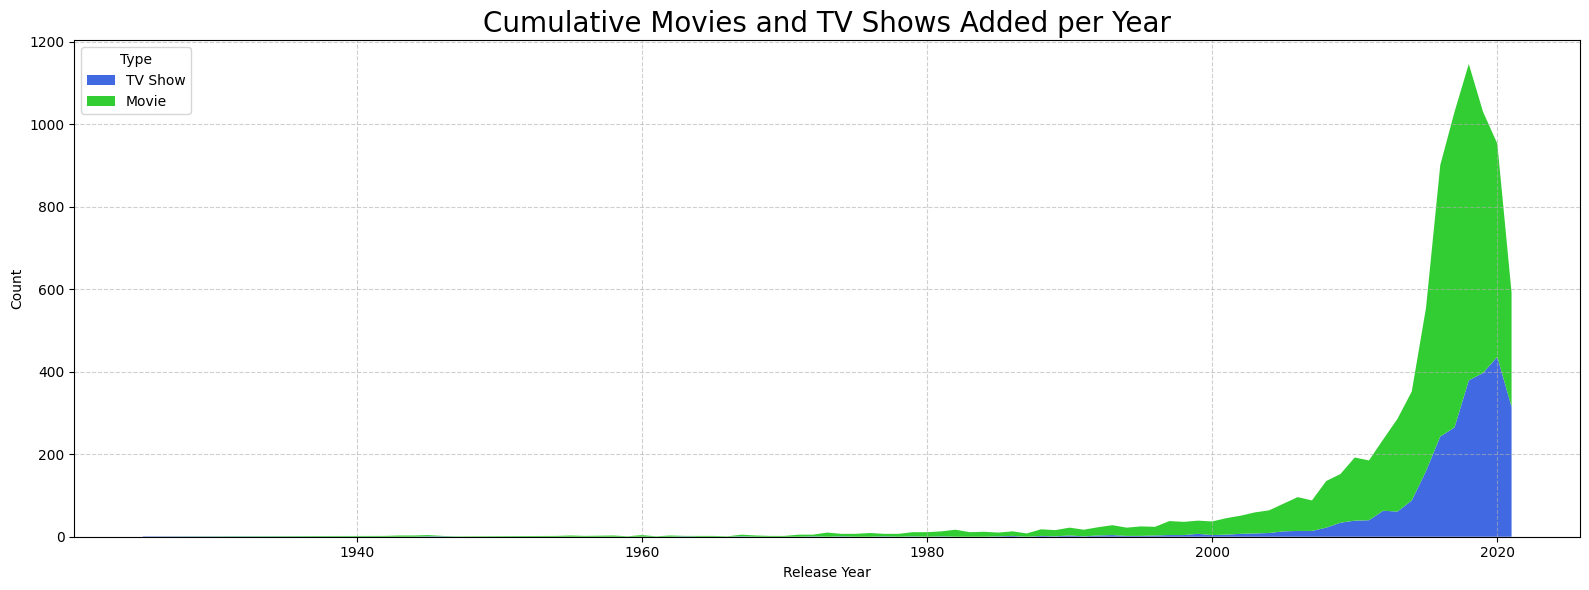

In [10]:
# 누적 그래프
plt.figure(figsize=(16, 6))
plt.stackplot(df_release_year['release_year'],  df_release_year['TV Show'], df_release_year['Movie'], labels=['TV Show', 'Movie'], colors=['royalblue', 'limegreen'])

plt.title('Cumulative Movies and TV Shows Added per Year', fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## year_added

In [96]:
# 넷플릭스에 추가된 연도별 Type별 추이 시각화
# 데이터프레임 생성
movie_year_added = df[df['type'] == 'Movie']['year_added'].value_counts()
tv_show_year_added = df[df['type'] == 'TV Show']['year_added'].value_counts()
total_year_added = movie_year_added + tv_show_year_added

df_year_added = pd.DataFrame({'Movie': movie_year_added, 'TV Show': tv_show_year_added, 'Total': total_year_added})
df_year_added.fillna(0, inplace=True)
df_year_added = df_year_added.reset_index()
df_year_added = df_year_added.rename(columns={'index': 'year_added'})

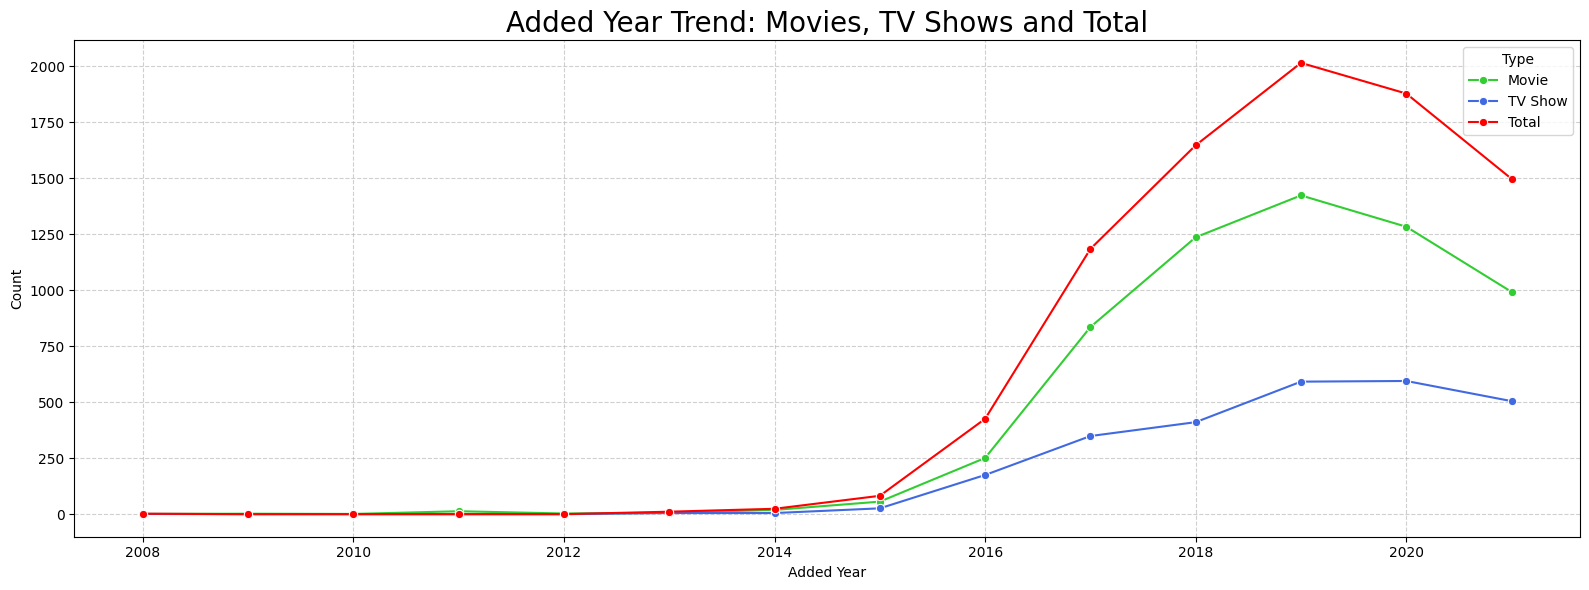

In [97]:
# 시각화
plt.figure(figsize=(16, 6))

sns.lineplot(data=df_year_added, x='year_added', y='Movie', label='Movie', marker='o', color='limegreen')
sns.lineplot(data=df_year_added, x='year_added', y='TV Show', label='TV Show', marker='o', color='royalblue')
sns.lineplot(data=df_year_added, x='year_added', y='Total', label='Total', marker='o', color='red')

plt.title('Added Year Trend: Movies, TV Shows and Total', fontsize=20)
plt.xlabel('Added Year')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## month_added

In [124]:
# 넷플릭스에 추가된 월별 Type별 추이 시각화
# 데이터프레임 생성
movie_month_added = df[df['type'] == 'Movie']['month_added'].value_counts()
tv_show_month_added = df[df['type'] == 'TV Show']['month_added'].value_counts()
total_month_added = movie_month_added + tv_show_month_added

df_month_added = pd.DataFrame({'Movie': movie_month_added, 'TV Show': tv_show_month_added, 'Total': total_month_added})
df_month_added.fillna(0, inplace=True)
df_month_added = df_month_added.reset_index()
df_month_added = df_month_added.rename(columns={'index': 'month_added'})

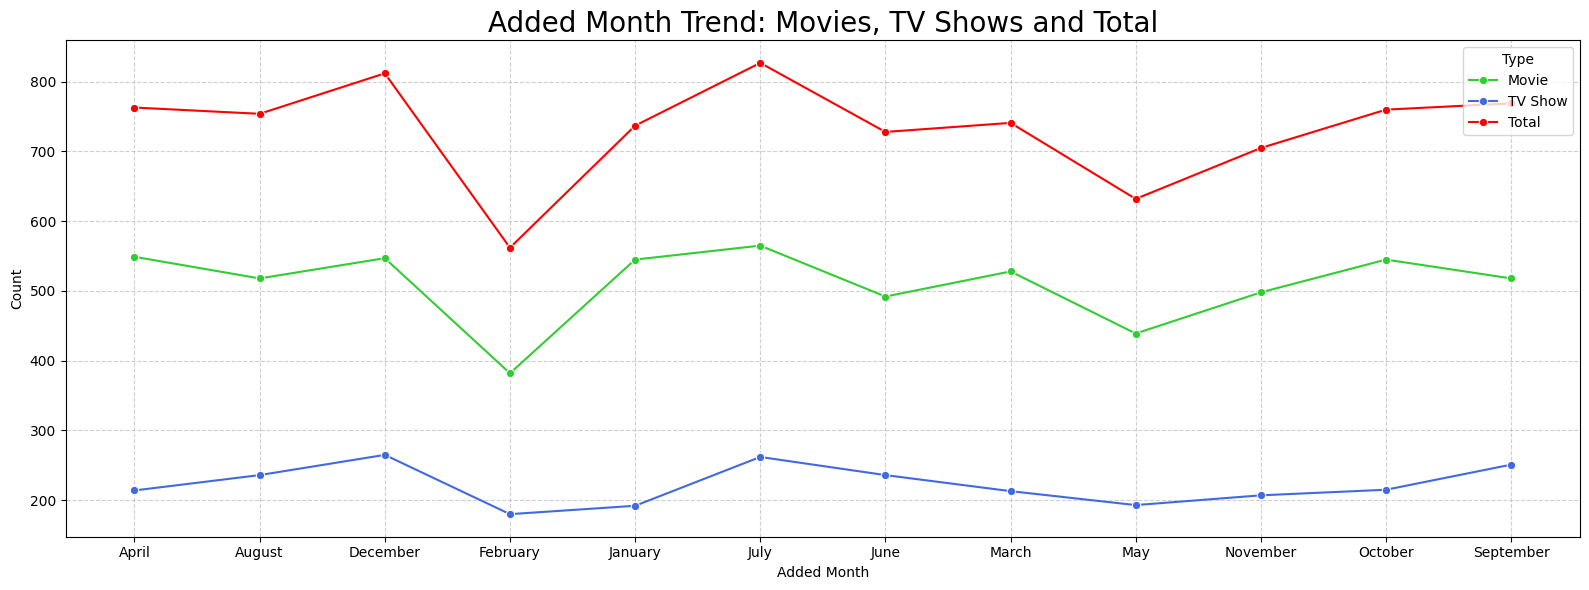

In [126]:
# 시각화
plt.figure(figsize=(16, 6))

sns.lineplot(data=df_month_added, x='month_added', y='Movie', label='Movie', marker='o', color='limegreen')
sns.lineplot(data=df_month_added, x='month_added', y='TV Show', label='TV Show', marker='o', color='royalblue')
sns.lineplot(data=df_month_added, x='month_added', y='Total', label='Total', marker='o', color='red')

plt.title('Added Month Trend: Movies, TV Shows and Total', fontsize=20)
plt.xlabel('Added Month')
plt.ylabel('Count')
plt.legend(title='Type', fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## rating

- 미국 기준 영상물 등급이 기재되어 있다
- 한국 기준과 비교하면 아래와 같다

|미국|한국|
|-|-|
|G|전체 관람가|
|PG|12세 관람가|
|PG-13|15세 관람가|
|R|청소년관람불가|
|NC-17|제한 상영가|
|TV-Y|전체 관람가(주로 만 2~6세 영유아)|
|TV-G|전체 관람가(영유아 대상x)|
|TV-Y7|7세 이상|
|TV-Y7-FV|7세 이상, 가상의 폭력묘사 포함|
|TV-PG|12세 관람가|
|TV-14|15세 관람가|
|TV-MA|청소년관람불가|
|NR|Not Rated|
|UR|Unrated(무삭제판)|



In [16]:
print(df['rating'].unique(), df['rating'].nunique())

# 영상물 등급 종류: 'PG-13', 'TV-MA, 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'
# 영상물 등급 개수: 14개

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR'] 14


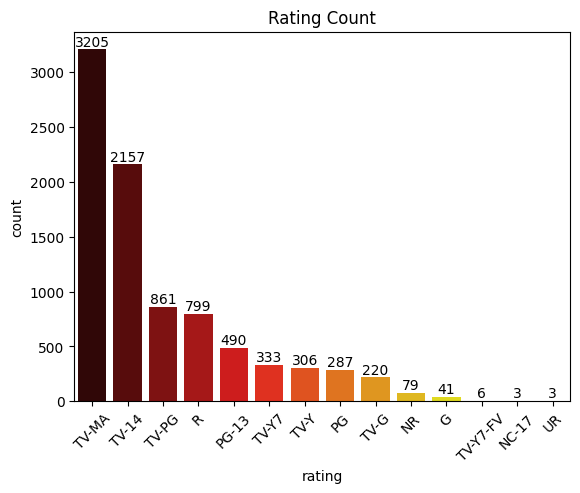

In [17]:
# rating 시각화
sns.countplot(data=df, x='rating', order=df['rating'].value_counts(ascending=False).index, palette='hot')

# count값 표시
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Rating Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
# type별 rating 데이터프레임 생성
movie_rating_counts = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_rating_counts = df[df['type'] == 'TV Show']['rating'].value_counts()

df_rating_counts = pd.DataFrame({'Movie': movie_rating_counts, 'TV Show': tv_show_rating_counts})

print(df_rating_counts)

          Movie  TV Show
rating                  
G            41      NaN
NC-17         3      NaN
NR           75      4.0
PG          287      NaN
PG-13       490      NaN
R           797      2.0
TV-14      1427    730.0
TV-G        126     94.0
TV-MA      2062   1143.0
TV-PG       540    321.0
TV-Y        131    175.0
TV-Y7       139    194.0
TV-Y7-FV      5      1.0
UR            3      NaN


In [19]:
# df_rating_counts의 결측치를 0으로 대체
df_rating_counts['Movie'] = df_rating_counts['Movie'].fillna(0)
df_rating_counts['TV Show'] = df_rating_counts['TV Show'].fillna(0)

# 'Total'컬럼 추가
df_rating_counts['Total'] = df_rating_counts['Movie'] + df_rating_counts['TV Show']

# 데이터 형식 변경
df_rating_counts['Movie'] = df_rating_counts['Movie'].astype(int)
df_rating_counts['TV Show'] = df_rating_counts['TV Show'].astype(int)
df_rating_counts['Total'] = df_rating_counts['Total'].astype(int)

print(df_rating_counts)

          Movie  TV Show  Total
rating                         
G            41        0     41
NC-17         3        0      3
NR           75        4     79
PG          287        0    287
PG-13       490        0    490
R           797        2    799
TV-14      1427      730   2157
TV-G        126       94    220
TV-MA      2062     1143   3205
TV-PG       540      321    861
TV-Y        131      175    306
TV-Y7       139      194    333
TV-Y7-FV      5        1      6
UR            3        0      3


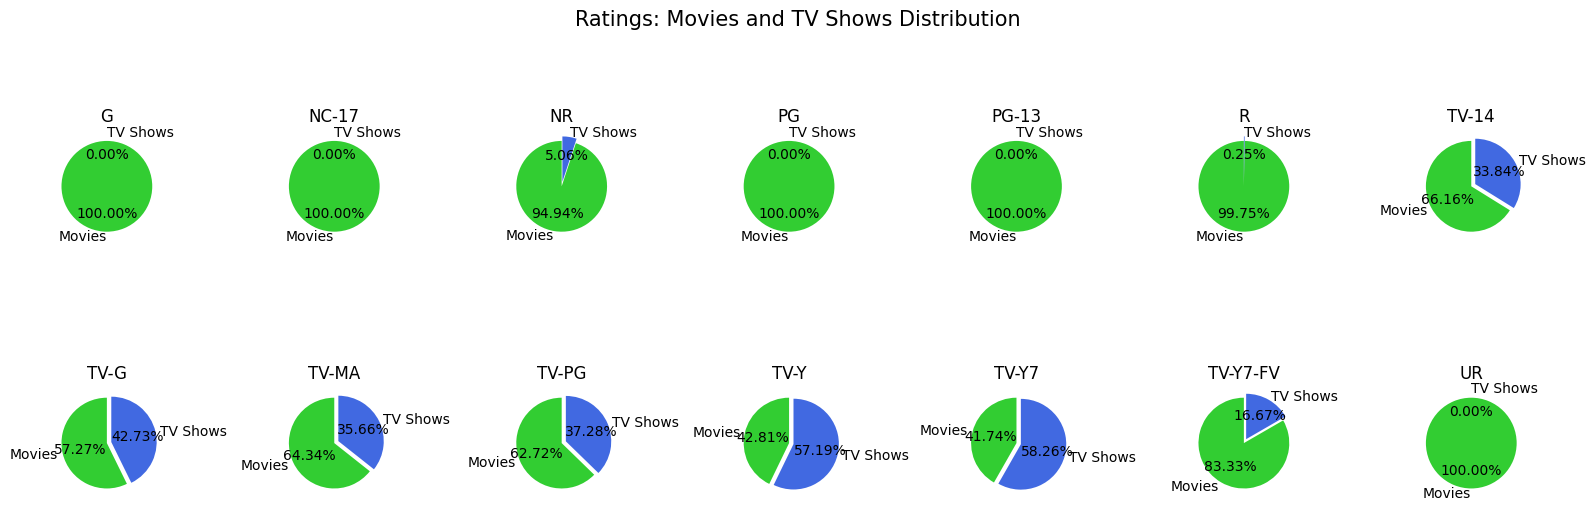

In [22]:
# df_rating_counts 시각화 - pie plot
fig, axes = plt.subplots(nrows = 2, ncols = 7, figsize=(16, 6))
fig.suptitle('Ratings: Movies and TV Shows Distribution', fontsize=15)

for idx, (rating, row) in enumerate(df_rating_counts.iterrows()):
    ax = axes[idx // 7, idx % 7]
    labels = ['Movies', 'TV Shows']
    sizes = [row['Movie'], row['TV Show']]
    colors = ['limegreen', 'royalblue']
    ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=[0, 0.1])
    ax.set_title(rating)

#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

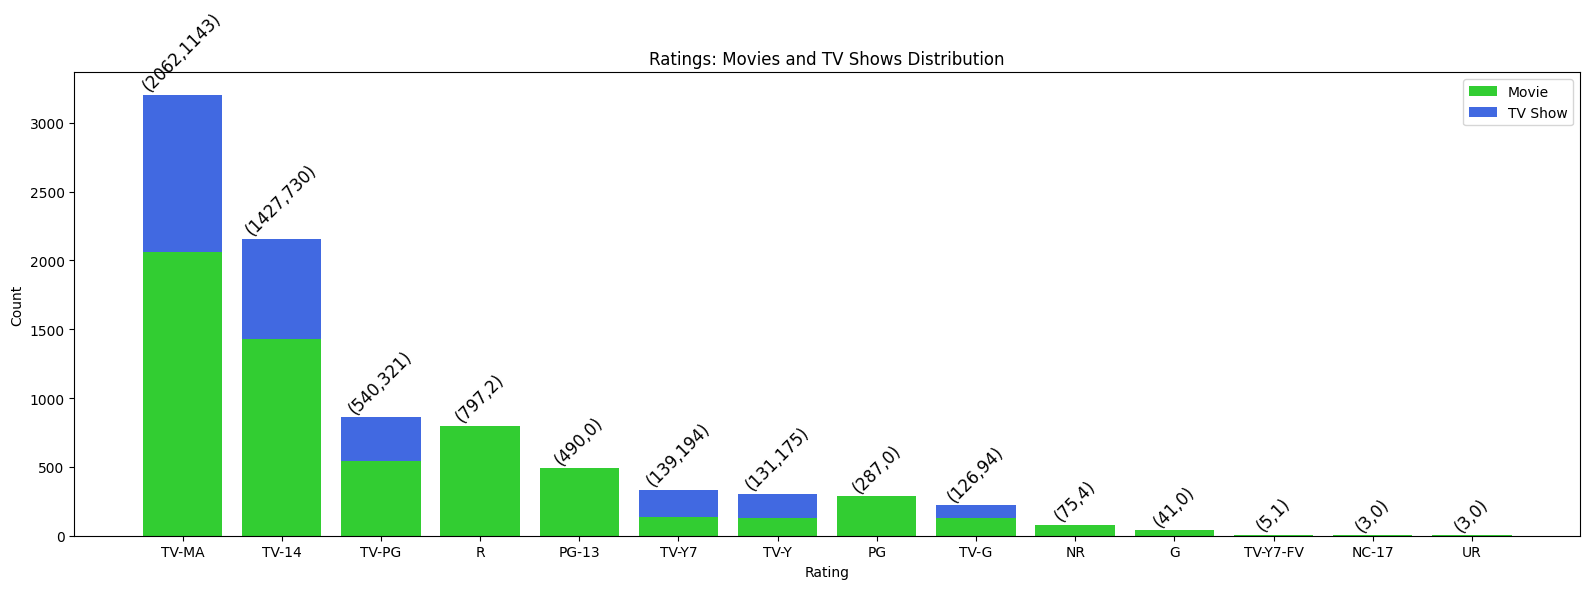

In [21]:
# df_rating_counts 시각화 - bar plot
# 내림차순 정렬
rating_desc = df_rating_counts.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(rating_desc.index, rating_desc['Movie'], label='Movie', color='limegreen')
ax.bar(rating_desc.index, rating_desc['TV Show'], bottom=rating_desc['Movie'], label='TV Show', color='royalblue')

for idx, row in rating_desc.iterrows():
    total_label = f"({int(row['Movie'])},{int(row['TV Show'])})"
    y_pos = row['Movie'] + row['TV Show']   # 바 너비 기준 조정
    ax.text(idx, y_pos, total_label, ha='center', va='bottom', fontsize=12, rotation=45)

ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Ratings: Movies and TV Shows Distribution')
ax.legend(loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## duration

### duration vs Movie

In [58]:
df['duration'].nunique()

220

In [69]:
# Movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

bins = [0, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
labels = ['0-60 min', '61-90 min', '91-120 min', '121-150 min', '151-180 min', '181-210 min', '211-240 min', '241-270 min', '271-300 min', '300+ min']
movies['duration_group'] = pd.cut(movies['duration_minutes'], bins=bins, labels=labels, right=False)

duration_group_counts = movies['duration_group'].value_counts().sort_index()

In [82]:
# Movie의 평균 duration계산

print(f'Movie의 평균 duration은 {movies["duration_minutes"].mean().round(2)} 분 이다')

Movie의 평균 duration은 99.58 분 이다


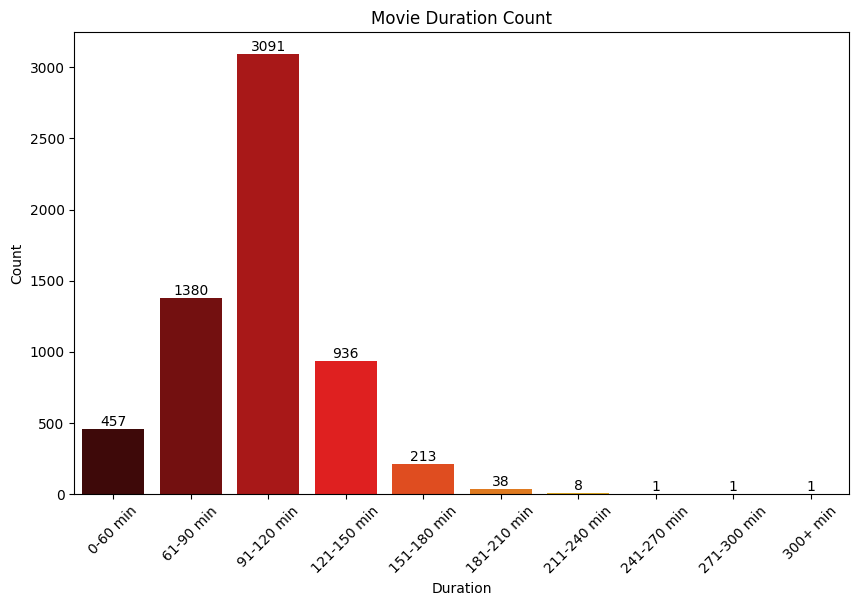

In [70]:
# Movie - duration 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_group_counts.index, y=duration_group_counts.values, palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Movie Duration Count')
plt.xlabel('Duration')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [92]:
# duration 짧은 영화순
movies = movies[movies['duration_minutes'] > 0]

short_dur = movies.sort_values(by='duration_minutes').head(10)

for i, row in enumerate(short_dur.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. Silent - 3.0 minutes (3 min)
2. Sol Levante - 5.0 minutes (5 min)
3. Cops and Robbers - 8.0 minutes (8 min)
4. Canvas - 9.0 minutes (9 min)
5. American Factory: A Conversation with the Obamas - 10.0 minutes (10 min)
6. Calico Critters: Everyone's Big Dream Flying in the Sky - 11.0 minutes (11 min)
7. Calico Critters: A Town of Dreams - 11.0 minutes (11 min)
8. Cosmos Laundromat: First Cycle - 12.0 minutes (12 min)
9. Besieged Bread - 12.0 minutes (12 min)
10. Zion - 12.0 minutes (12 min)


In [93]:
# duration 긴 영화순
movies = movies[movies['duration_minutes'] > 0]

long_dur = movies.sort_values(by='duration_minutes',ascending=False).head(10)

for i, row in enumerate(long_dur.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. Black Mirror: Bandersnatch - 312.0 minutes (312 min)
2. Headspace: Unwind Your Mind - 273.0 minutes (273 min)
3. The School of Mischief - 253.0 minutes (253 min)
4. No Longer kids - 237.0 minutes (237 min)
5. Lock Your Girls In - 233.0 minutes (233 min)
6. Raya and Sakina - 230.0 minutes (230 min)
7. Once Upon a Time in America - 229.0 minutes (229 min)
8. Sangam - 228.0 minutes (228 min)
9. Lagaan - 224.0 minutes (224 min)
10. Jodhaa Akbar - 214.0 minutes (214 min)


### duration vs TV Show

In [74]:
# TV Show
tv_shows = df[df['type'] == 'TV Show']
tv_duration_counts = tv_shows['duration'].value_counts()
tv_duration_counts = pd.DataFrame(tv_duration_counts)
tv_duration_counts.reset_index(inplace=True)
tv_duration_counts.columns = ['duration', 'count']

In [86]:
# TV Show의 평균 duration계산
data = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
tv_shows_df = data[data['type'] == 'TV Show'].dropna(subset=['duration']).copy()
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(int)

average_seasons = tv_shows_df['seasons'].mean().round(2)

print(f'TV Show의 평균 duration은 {average_seasons}season 이다')

TV Show의 평균 duration은 1.75season 이다


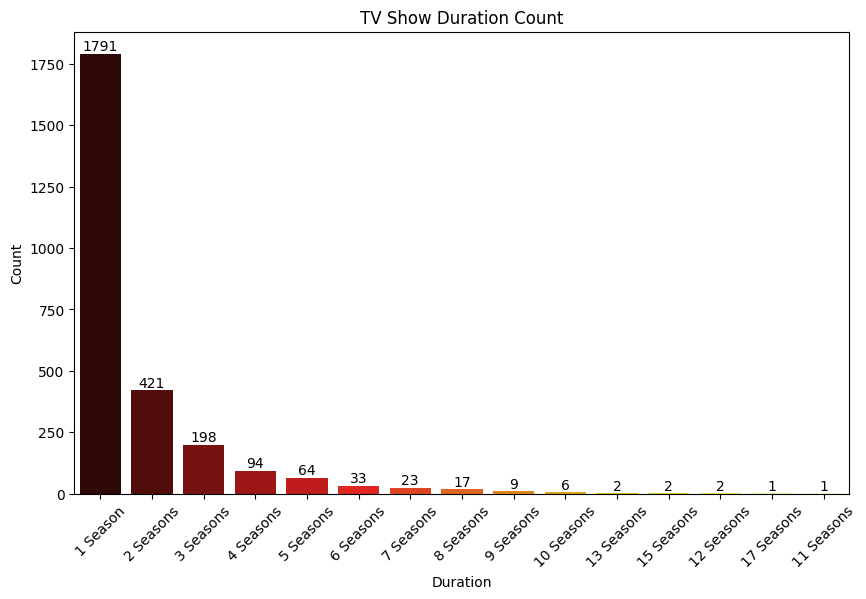

In [85]:
# TV Show - duration 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=tv_duration_counts, x='duration', y='count', palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('TV Show Duration Count')
plt.xlabel('Duration')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## listed_in (장르)

### 전체

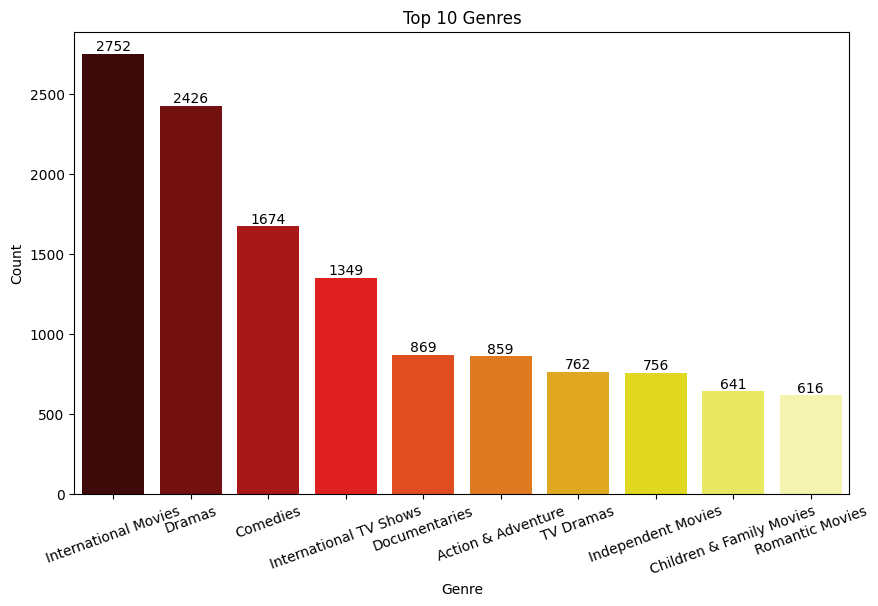

In [49]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

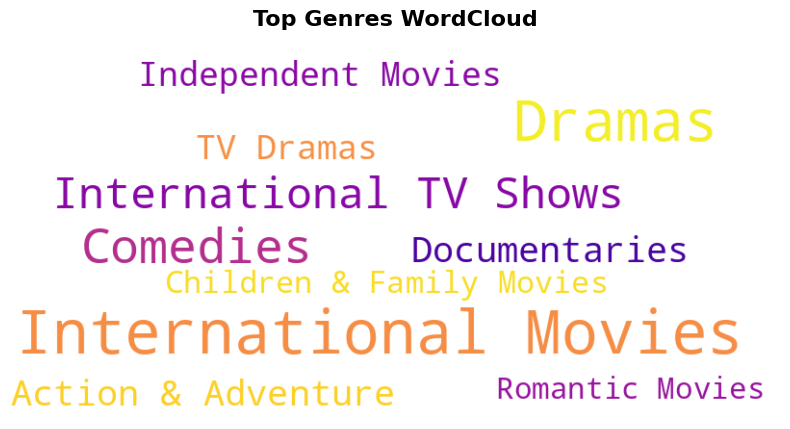

In [117]:
# 워드클라우드
# top_genres를 딕셔너리로 변환
data = {
    "International Movies": 2752,
    "Dramas": 2426,
    "Comedies": 1674,
    "International TV Shows": 1349,
    "Documentaries": 869,
    "Action & Adventure": 859,
    "TV Dramas": 762,
    "Independent Movies": 756,
    "Children & Family Movies": 641,
    "Romantic Movies": 616,
}

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Genres WordCloud", fontsize=16, weight="bold")
plt.show()

In [45]:
print(top_genres)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


### Movie

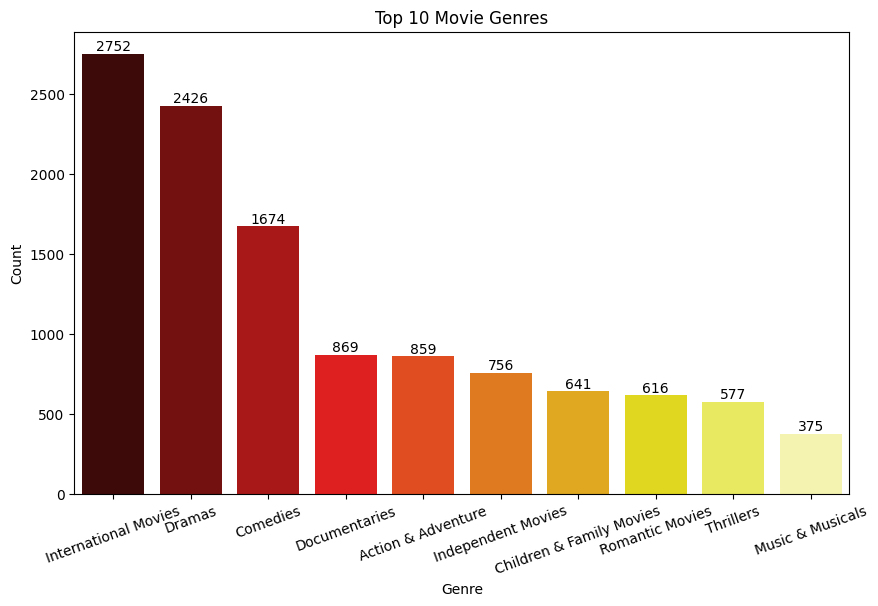

In [128]:
# Movie
movie_genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=movie_genres.index, y=movie_genres.values, palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

In [131]:
print(movie_genres)

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


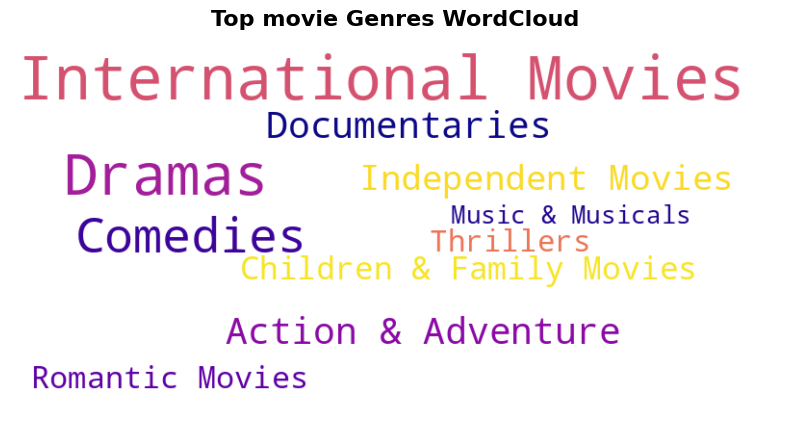

In [132]:
# 워드클라우드
# movie_genres를 딕셔너리로 변환
data = {
    "International Movies": 2752,
    "Dramas": 2426,
    "Comedies": 1674,
    "Documentaries": 869,
    "Action & Adventure": 859,
    "Independent Movies": 756,
    "Children & Family Movies": 641,
    "Romantic Movies": 616,
    "Thrillers": 577,
    "Music & Musicals": 375
}

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top movie Genres WordCloud", fontsize=16, weight="bold")
plt.show()

### TV Show

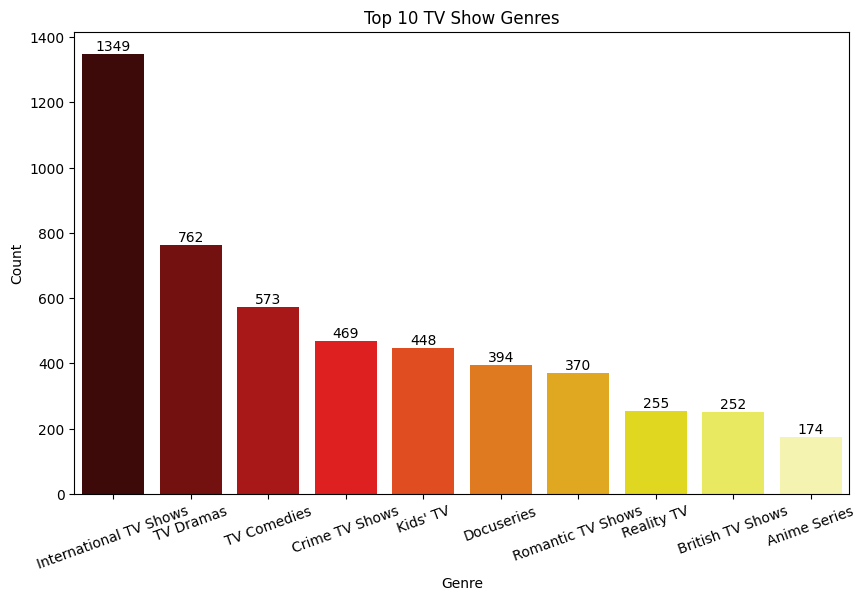

In [129]:
# TV Show
tv_show_genres = df[df['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=tv_show_genres.index, y=tv_show_genres.values, palette='hot')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 TV Show Genres')
plt.xlabel('Genre')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

In [133]:
print(tv_show_genres)

listed_in
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


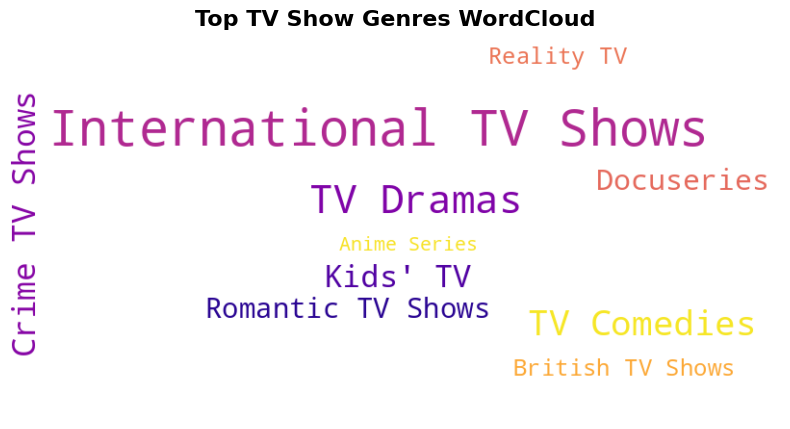

In [135]:
# 워드클라우드
# tv_show_genres를 딕셔너리로 변환
data = {
    "International TV Shows": 1349,
    "TV Dramas": 762,
    "TV Comedies": 573,
    "Crime TV Shows": 469,
    "Kids' TV": 448,
    "Docuseries": 394,
    "Romantic TV Shows": 370,
    "Reality TV": 255,
    "British TV Shows": 252,
    "Anime Series": 174
}

# 워드클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="plasma"
).generate_from_frequencies(data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top TV Show Genres WordCloud", fontsize=16, weight="bold")
plt.show()